# Introduction to Scikit-Learn (sklearn)

This notebook contains the most useful functions of the Scikit-Learn library, as taught by the course instructor.

What will we cover:
0. An end-to-end Scikit-Len workflow
1. Getting the data ready
2. Choosing the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

In [50]:
what_will_we_cover= [
"0. An end-to-end Scikit-Len workflow",
"1. Getting the data ready",
"2. Choosing the right estimator/algorithm for our problems",
"3. Fit the model/algorithm and use it to make predictions on our data",
"4. Evaluating a model",
"5. Improve a model",
"6. Save and load a trained model",
"7. Putting it all together!"]

# 0. An end to end Scikit-Learn workflow

In [1]:
import pandas as pd

In [2]:
# 1. Getting the data ready
heart_df = pd.read_csv('heart-disease.csv')
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X (features matrix)
X = heart_df.drop('target', axis=1)
# axis 1 - column

# Create y (labels)
y = heart_df['target']

In [7]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# keep the default hyperparams
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
# 3. fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2)

In [9]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
# make a prediction
import numpy as np

# y_label = clf.predict(np.array([0,2,3,4]))
# does not work, as dimensions do not match

D:\Machine_Learning_contd\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [11]:
X_train
# we need to pass in args of the data similar to X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2
207,60,0,0,150,258,0,0,157,0,2.6,1,2,3
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3
114,55,1,1,130,262,0,1,155,0,0.0,2,0,2
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [12]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1])

In [13]:
y_test

8      1
47     1
194    0
272    0
206    0
      ..
60     1
252    0
218    0
103    1
4      1
Name: target, Length: 61, dtype: int64

In [14]:
# 4. Evaluate the model on training data and test data
clf.score(X_train, y_train)

1.0

In [15]:
clf.score(X_test, y_test)

0.7868852459016393

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.74      0.64      0.68        22
           1       0.81      0.87      0.84        39

    accuracy                           0.79        61
   macro avg       0.77      0.75      0.76        61
weighted avg       0.78      0.79      0.78        61



In [18]:
confusion_matrix(y_test, y_preds)

array([[14,  8],
       [ 5, 34]])

In [19]:
accuracy_score(y_test, y_preds)

0.7868852459016393

In [35]:
# 5. Improve a model
# Try different amount of n_estimators

np.random.seed(seed=5)
# why do you need to set the seed?
# ans - a random forest inherently changes the features used in the trees. we set the seed to maintain consistency in the features used

acc_scores_y = []

for i in range(10, 101, 10):
    print(f"Trying model with {i} estimators: ")
    
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print(" ")
    
    acc_scores_y.append(clf.score(X_test, y_test) * 100)

Trying model with 10 estimators: 
Model accuracy on test set: 73.77%
 
Trying model with 20 estimators: 
Model accuracy on test set: 75.41%
 
Trying model with 30 estimators: 
Model accuracy on test set: 75.41%
 
Trying model with 40 estimators: 
Model accuracy on test set: 78.69%
 
Trying model with 50 estimators: 
Model accuracy on test set: 78.69%
 
Trying model with 60 estimators: 
Model accuracy on test set: 78.69%
 
Trying model with 70 estimators: 
Model accuracy on test set: 75.41%
 
Trying model with 80 estimators: 
Model accuracy on test set: 78.69%
 
Trying model with 90 estimators: 
Model accuracy on test set: 75.41%
 
Trying model with 100 estimators: 
Model accuracy on test set: 77.05%
 


In [27]:
acc_scores_x = [i for i in range(10,101,10)]
acc_scores_x

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [24]:
# make a scatterplot of the accuracy scores
import matplotlib.pyplot as plt
%matplotlib inline

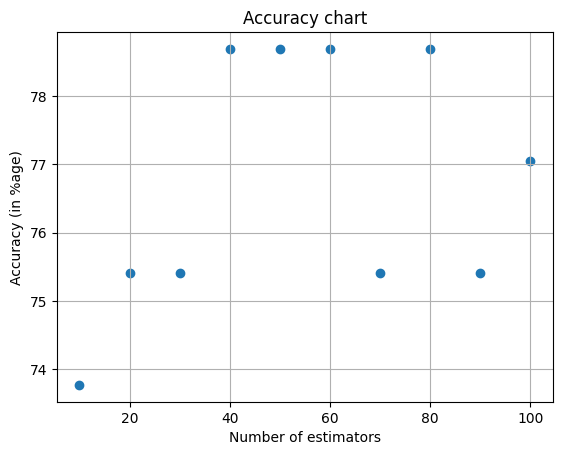

In [31]:
# make a plot representing the accuracy achieved when we changed the number of estimators used

fig, ax = plt.subplots()
ax.scatter(acc_scores_x, acc_scores_y);
ax.set(title='Accuracy chart',
       xlabel='Number of estimators',
       ylabel='Accuracy (in %age)')
plt.grid()

In [32]:
# 6. Save the model and load it
import pickle

pickle.dump(clf, open("Random_forest_model_1.pkl", "wb"))

In [34]:
loaded_model = pickle.load(open("Random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.7704918032786885

## Let us try doing the same thing, all in a single cell, but by using a lot more number of estimators

Trying model with 70 estimators: 
Model accuracy on test set: 77.05%
 
Trying model with 80 estimators: 
Model accuracy on test set: 78.69%
 
Trying model with 90 estimators: 
Model accuracy on test set: 75.41%
 
Trying model with 100 estimators: 
Model accuracy on test set: 80.33%
 
Trying model with 110 estimators: 
Model accuracy on test set: 73.77%
 
Trying model with 120 estimators: 
Model accuracy on test set: 75.41%
 
Trying model with 130 estimators: 
Model accuracy on test set: 80.33%
 
Trying model with 140 estimators: 
Model accuracy on test set: 75.41%
 
Trying model with 150 estimators: 
Model accuracy on test set: 78.69%
 
Trying model with 160 estimators: 
Model accuracy on test set: 73.77%
 
Trying model with 170 estimators: 
Model accuracy on test set: 78.69%
 
Trying model with 180 estimators: 
Model accuracy on test set: 77.05%
 
Trying model with 190 estimators: 
Model accuracy on test set: 78.69%
 
Trying model with 200 estimators: 
Model accuracy on test set: 77.0

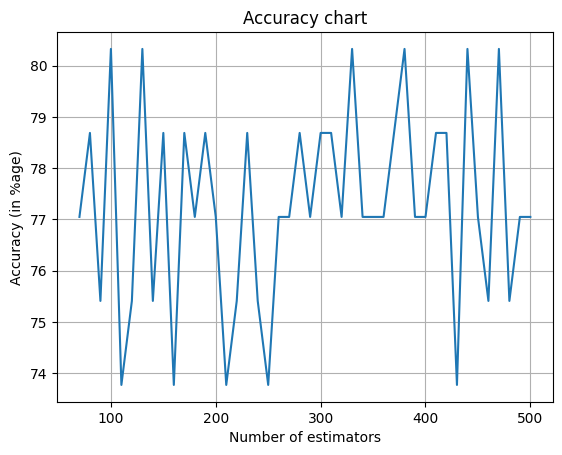

In [36]:
# standard imports
np.random.seed(seed=5)
# why do you need to set the seed?
# ans - a random forest inherently changes the features used in the trees. we set the seed to maintain consistency in the features used

acc_scores_ya = []

for i in range(70, 501, 10):
    print(f"Trying model with {i} estimators: ")
    
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print(" ")
    
    acc_scores_ya.append(clf.score(X_test, y_test) * 100)
    
acc_scores_xa = [i for i in range(70, 501, 10)]

fig, ax = plt.subplots()
ax.plot(acc_scores_xa, acc_scores_ya);
ax.set(title='Accuracy chart',
       xlabel='Number of estimators',
       ylabel='Accuracy (in %age)')
plt.grid()

pickle.dump(clf, open("Random_forest_model_1a.pkl", "wb"))

In [37]:
# the least number os estimators for the highest accuracy
def least_no_of_estimators(acc_scores_x, acc_scores_y):
    max_y_index = acc_scores_y.index(max(acc_scores_y))
    least_x = acc_scores_x[max_y_index]
    return least_x

least_x = least_no_of_estimators(acc_scores_xa, acc_scores_ya)
least_x

100

In [40]:
# setting n_estimators to least_x

clf = RandomForestClassifier(n_estimators=least_x).fit(X_train, y_train)
print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    
acc_scores_ya.append(clf.score(X_test, y_test) * 100)

Model accuracy on test set: 75.41%


In [41]:
pickle.dump(clf, open("Random_forest_model_1b.pkl", "wb"))

In [42]:
loaded_model_b = pickle.load(open("Random_forest_model_1b.pkl", "rb"))
loaded_model_b.score(X_test, y_test)

0.7540983606557377

In [45]:
print(f"Score for the model, which scored the highest accuracy on our testing dataset, is: {loaded_model_b.score(X_test, y_test)*100:.2f}%")

Score for the model, which scored the highest accuracy on our testing dataset, is: 75.41%


# Once more

In [51]:
what_will_we_cover  

['0. An end-to-end Scikit-Len workflow',
 '1. Getting the data ready',
 '2. Choosing the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. getting our data ready
Three main things we need to do:
* Split the data into features and labels (usually `x` and `y`)
* Filling (also called imputing) or disregarding missing values
* Converting non-numerical values to numerical values (also called feature encoding)

In [54]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [55]:
# remove the target column
X = heart_df.drop('target', axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [56]:
y = heart_df.target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

We will next divide our data into two parts - training and test sets.   
In ML, never test your model on the same data that it has been trained upon.

In [57]:
# split the data into training and test scores
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [58]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))